# How do colleges talk about diversity on social media?

Welcome! This project examines the use of Twitter by four-year colleges and universities. Specifically, I examine Tweets related to race and gender diversity. This page is focused on the analysis of the data. At the bottom of this page you will find links to tutorials to guide you through reproducing this analysis or recreating it with your own data. 

The project repository can be found at https://github.com/LaurenDahlin/colleges_on_social_media.

## Analysis

### The Data and College Tweets in General

The data in this analysis comes from all original (non-retweet) Twitter postings made by four-year colleges on their main Twitter pages and admissions Twitter pages (if they have a separate admissions page). The graph below shows the growth in tweeting by colleges from 2008-2017. 

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
plotly.tools.set_credentials_file(username='lauren.n.dahlin', api_key='9jGO22biut6FCgNae1hC')
import gc, glob, re

In [12]:
pkl_files = glob.glob(r'../data/clean/diversity_full_*.pkl')
append_tweets = []
for file in pkl_files:
    tw_df = pd.read_pickle(file)
    append_tweets.append(tw_df)
    del tw_df
    gc.collect()
diversity_df = pd.concat(append_tweets, ignore_index=True)

In [4]:
diversity_df = diversity_df.assign(year = diversity_df.date.astype(str).str[:4].astype(int))

In [7]:
year_summary = diversity_df.groupby('year').agg({'ipeds_id': lambda x: x.nunique(), 'id': 'count'})
year_summary.reset_index(level=0, inplace=True)
year_summary = year_summary[year_summary.year<2018]
year_summary.rename(index=str, columns={'ipeds_id':'School Count', 'id':'Tweet Count'}, inplace=True)

In [8]:
trace1 = go.Scatter(
    x=year_summary.year,
    y=year_summary['School Count'],
    name='School Count'
)
trace2 = go.Scatter(
    x=year_summary.year,
    y=year_summary['Tweet Count'],
    name='Tweet Count',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='Total Number of Colleges and Tweets by Year',
    yaxis=dict(
        title='Number of Colleges'
    ),
    yaxis2=dict(
        title='Number of Tweets',
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = "tweets_over_time")

We are seeing a slight decline in the number of tweets produced by colleges in recent years. This likely reflects a shift in the number of platforms being used by colleges to reach students. For example, many colleges are now also posting on Instagram.

#### So what are these colleges talking about?

In [20]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [16]:
# Data is too big for memory. Take a random sample of 10%
np.random.seed(12345)
# Create a column with random number - will be used to subset the data
diversity_df = diversity_df.assign(rand_int = np.random.randint(0, 99, diversity_df.shape[0]))

In [17]:
diversity_df = diversity_df.assign(words=diversity_df.words.astype(str))

In [18]:
text = " ".join(tw for tw in diversity_df[diversity_df.rand_int<10].words)
text = re.sub(r'([^\s\w]|_)+', '', text)

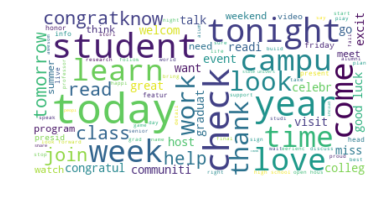

In [21]:
# https://www.datacamp.com/community/tutorials/wordcloud-python
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Perhaps not surprisingly, most of these words are very generic words related to college and accolades: student, learn, congrat (congratulations), thank, campu (campus), and communiti (community). Note that the words are stemmed from earlier pre-processing of the data.

### Diversity-Specific Tweeting

Now, let's look at the diversity-specific tweets. I have flagged tweets that mention "diversity" and "multicultural", as well as tweets with race ('black', 'african', 'asian', 'hispan', 'latino', 'latina') and gender ('woman', 'women','gender') -related words. How have the frequency of these words changed over time?

In [31]:
diversity_df = diversity_df.assign(year = diversity_df.date.astype(str).str[:4].astype(int))

In [32]:
year_summary2 = diversity_df.groupby('year').agg({'diversity_flag': 'sum', 'race_flag': 'sum', 'gender_flag': 'sum'})

In [34]:
year_summary2.reset_index(level=0, inplace=True)
year_summary2 = year_summary2[year_summary2.year<2018]

In [36]:
year_summary2

,year,diversity_flag,race_flag,gender_flag
0,2007,0.0,0.0,1.0
1,2008,36.0,83.0,482.0
2,2009,435.0,1148.0,4078.0
3,2010,682.0,1824.0,5792.0
4,2011,911.0,2733.0,7482.0
5,2012,1180.0,3460.0,9656.0
6,2013,1487.0,3671.0,10411.0
7,2014,1903.0,3721.0,9665.0
8,2015,2063.0,4159.0,8917.0
9,2016,2515.0,3972.0,7862.0


In [37]:
trace1 = go.Scatter(
    x=year_summary2.year,
    y=year_summary2.diversity_flag,
    name='Diversity Tweet Count'
)
trace2 = go.Scatter(
    x=year_summary2.year,
    y=year_summary2.race_flag,
    name='Race Tweet Count'
)
trace3 = go.Scatter(
    x=year_summary2.year,
    y=year_summary2.gender_flag,
    name='Gender Tweet Count'
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    title='Total Number of Diversity-Related Tweets by Year',
    yaxis=dict(
        title='Number of Tweets'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = "diversity_tweets_over_time")

Interestingly, the number of gender-related tweets has decreased in recent years. This may reflect the fact that women are now the majority of applicants and degree-holders at U.S. universities.

#### A sample of diversity-related tweets:

Note that flagging based on keywords alone does not produce a perfect match to diversity-related tweets.

In [60]:
pd.set_option('max_colwidth',200)
for index,row in diversity_df[(diversity_df.rand_int<1) & (diversity_df.diversity_flag==True)][:20].iterrows():
    print(row['tweet'])

UA Students to Present ‘Diversity Demonstrated’  http://bit.ly/IKzQ9I 
The Department of English and Foreign Languages and the Office of Multicultural Affairs invite UM students,...  http://fb.me/Nj2iJJ7G
Meaningful conversations: Black Student Union president Andrew Freed is passionate about enhancing diversity at #UAA  http://ow.ly/KvFHJ .
#SoCaltech is an occasional series celebrating the diverse individuals who give Caltech its spirit of excellence, ambition, and ingenuity. Know someone we should profile? Send nominations to magazine@caltech.edu. pic.twitter.com/BplE0rwLgA
Stay strong and stop bullying--Join the Office of Diversity for a group photo in front of Kendall Hall @ 12pm today! pic.twitter.com/Cbg7EHLDRp
Cross Cultural Week! Check out the multicultural sorority & fraternity booths till 1p #FresWOW  http://bit.ly/FSXCultural  pic.twitter.com/oVqYnBdQ3T
#inaug2013: Garcia: It is important that  as our country becomes more diverse that we live up to our promise of equal educ

### What kinds of images are associated with diversity-related tweets?

In [52]:
from IPython.display import Image
from IPython.core.display import HTML 

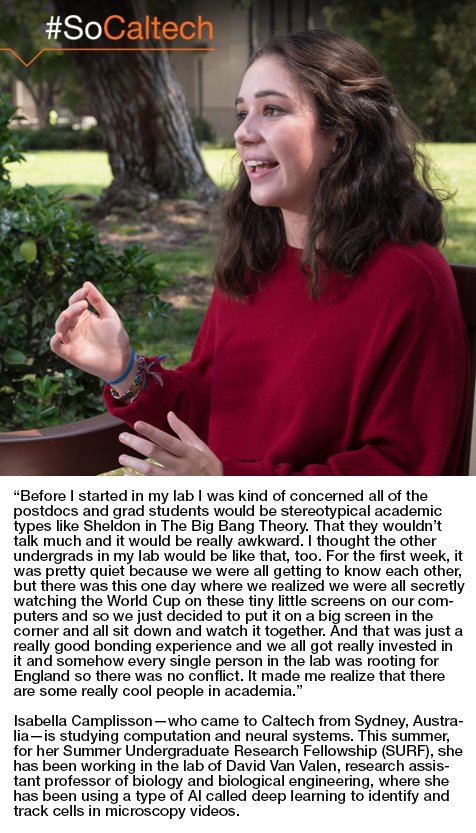

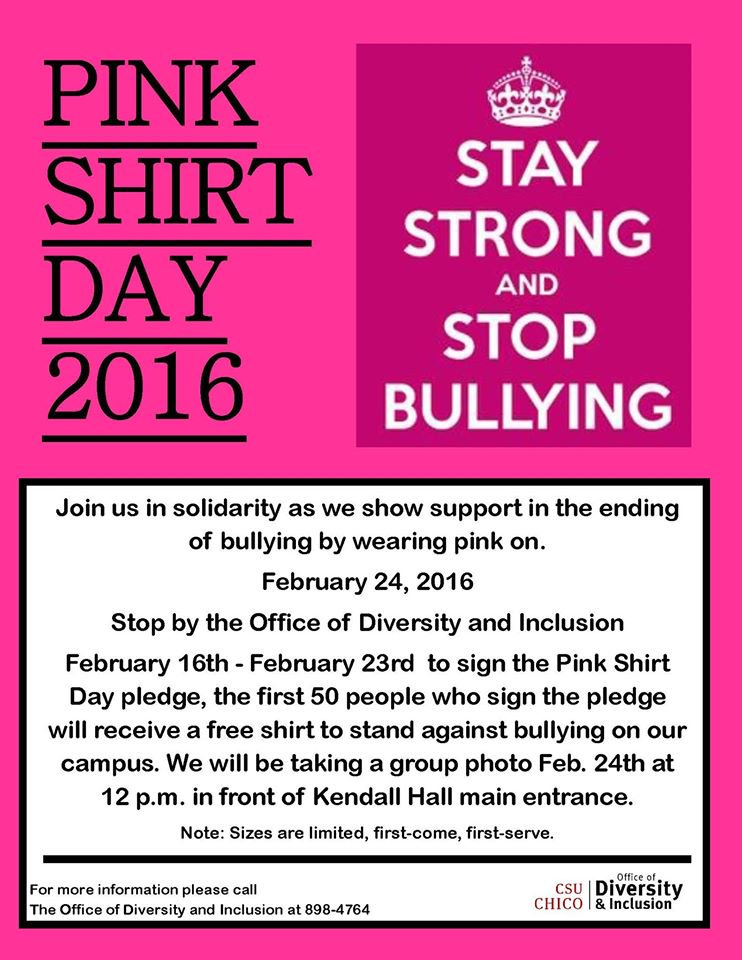

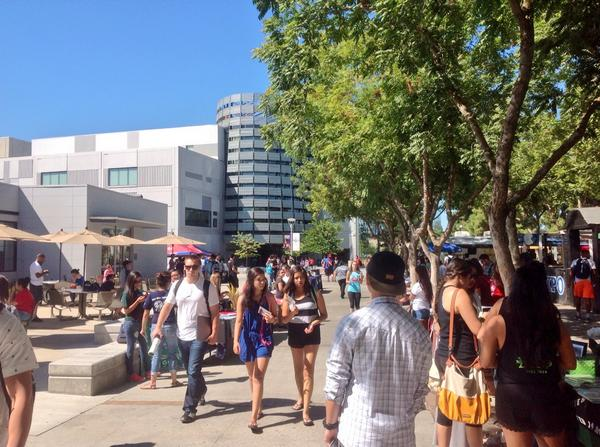

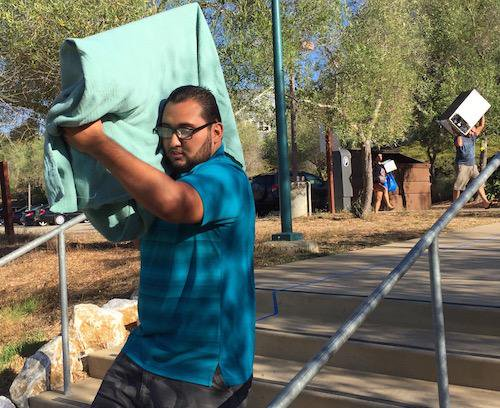

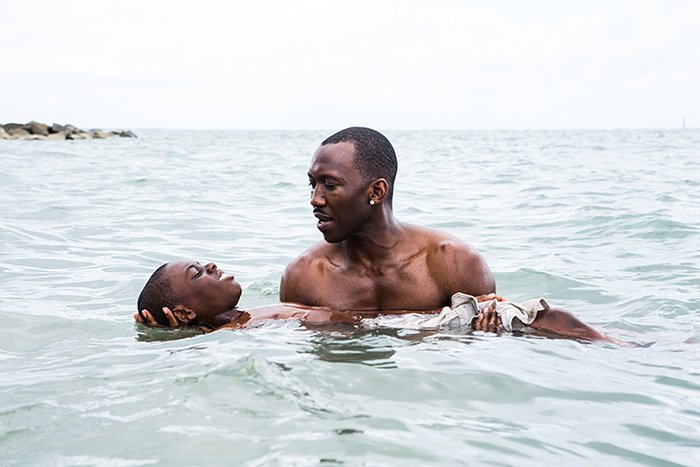

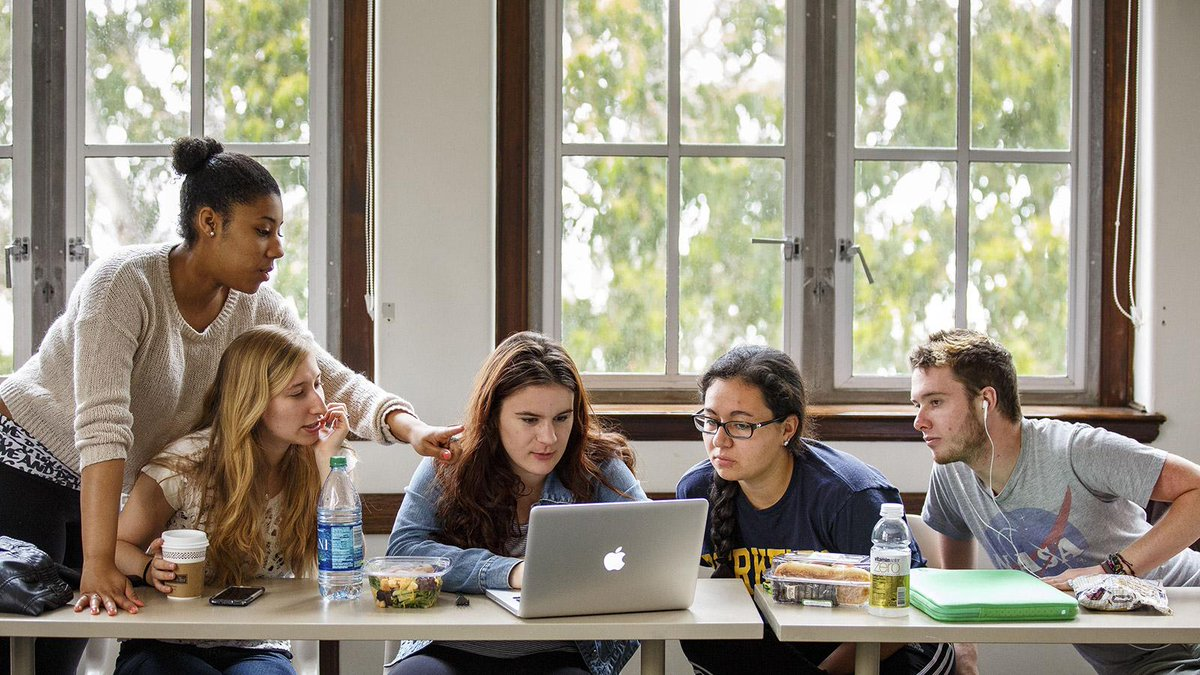

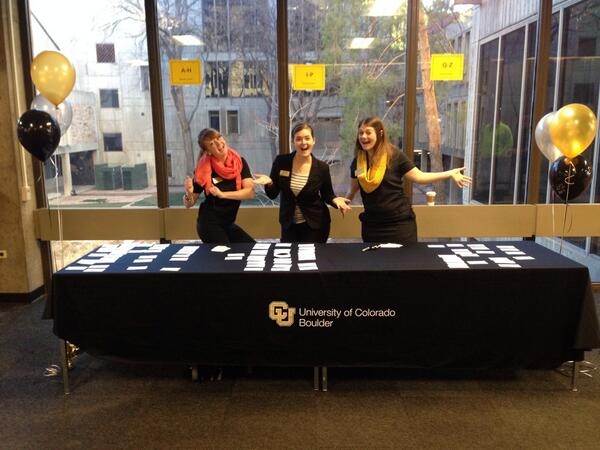

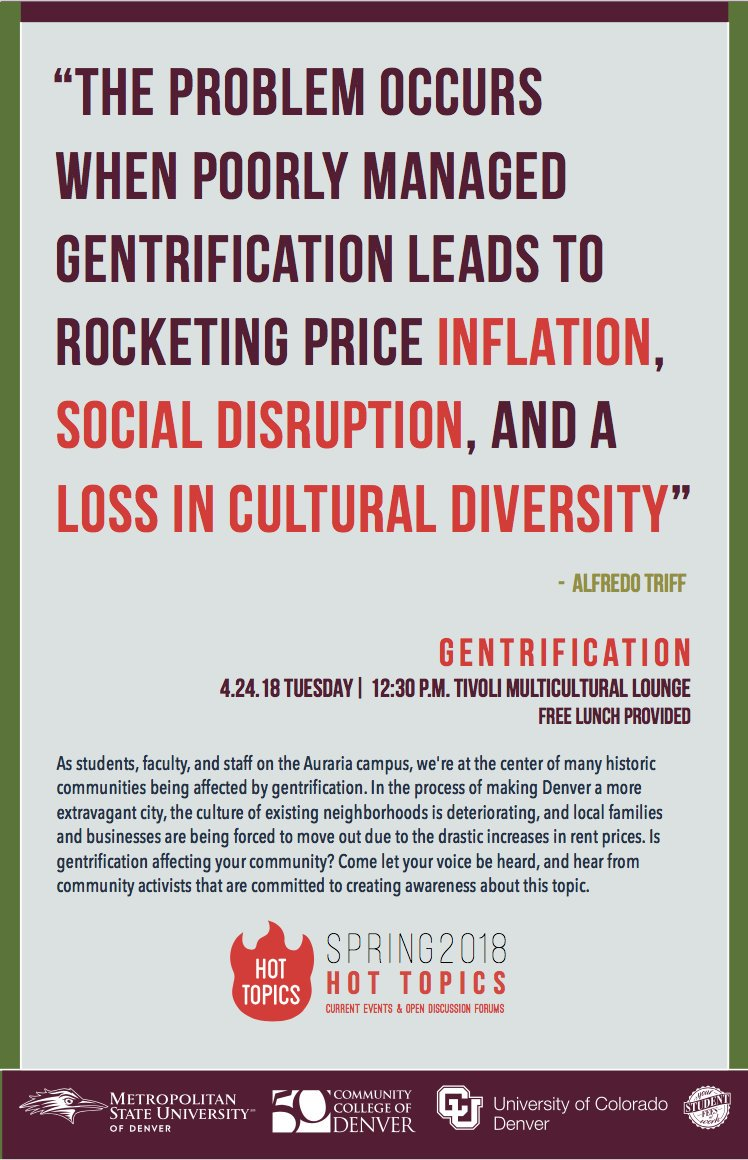

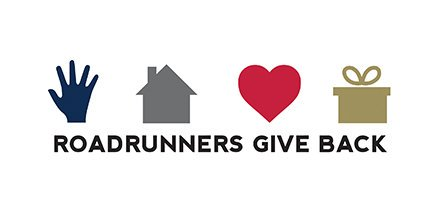

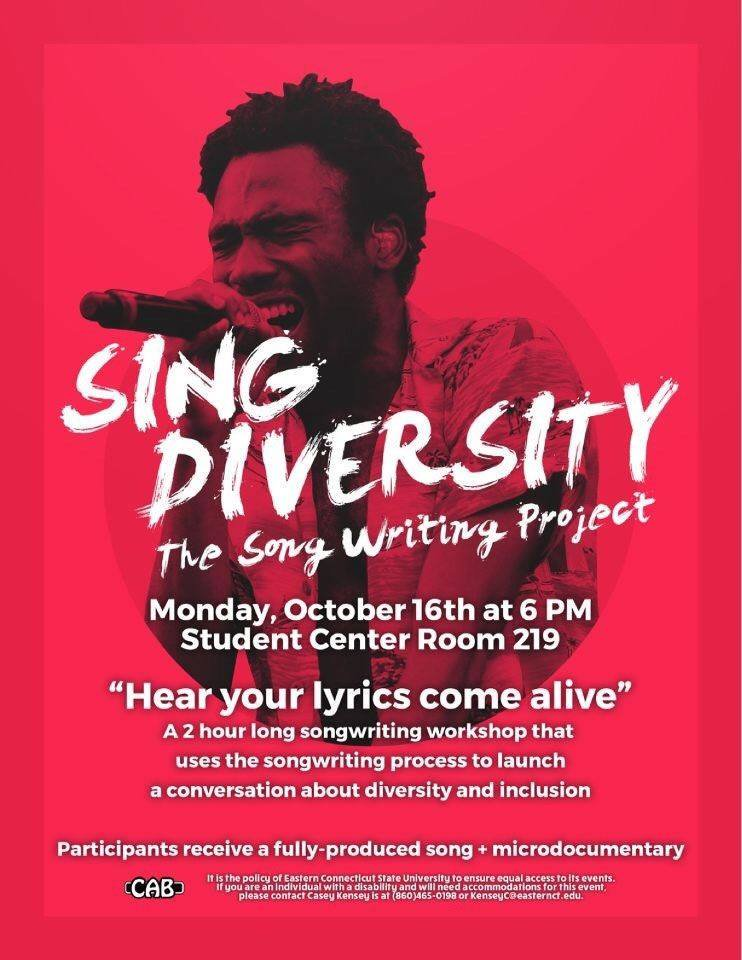

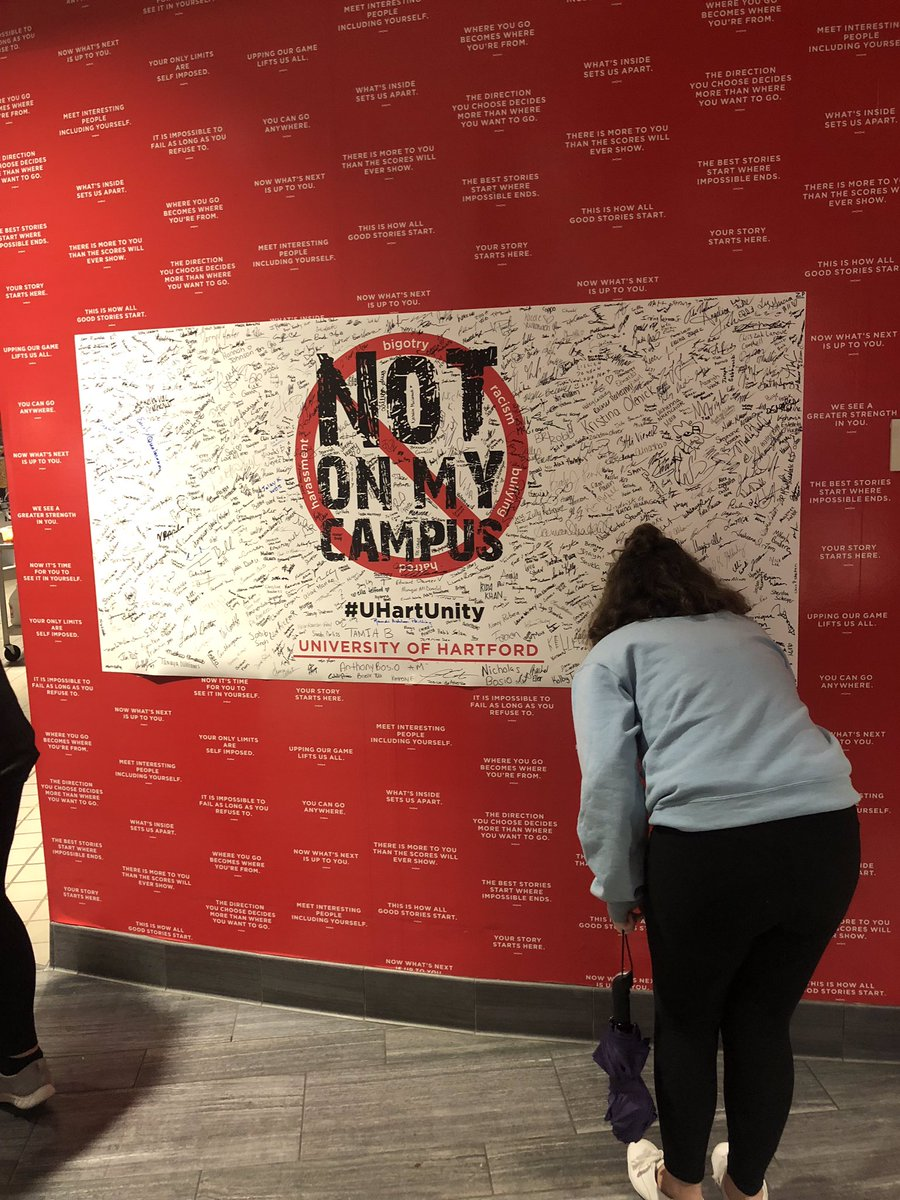

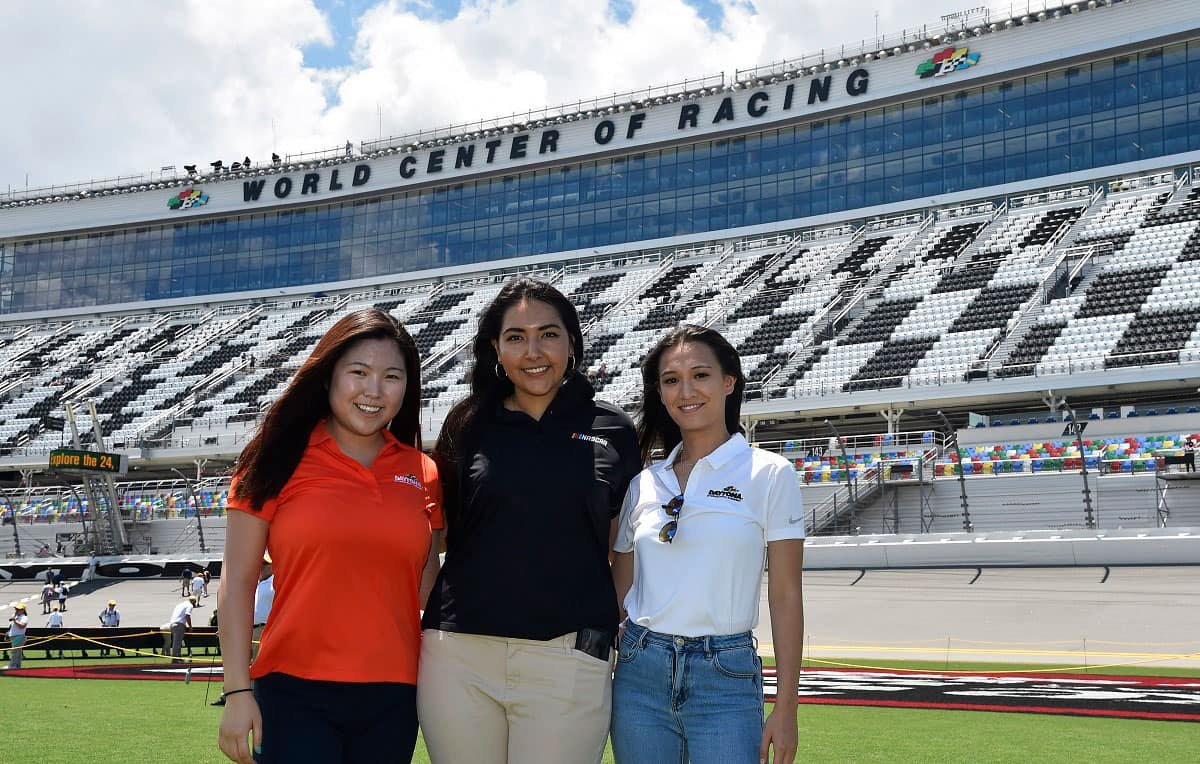

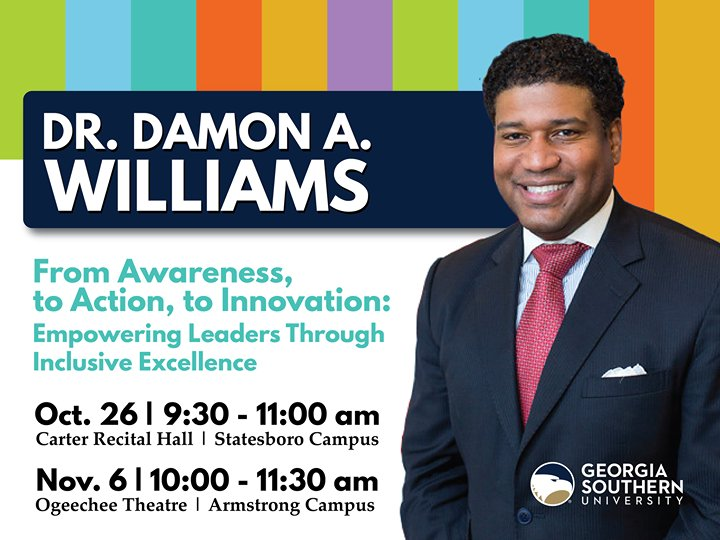

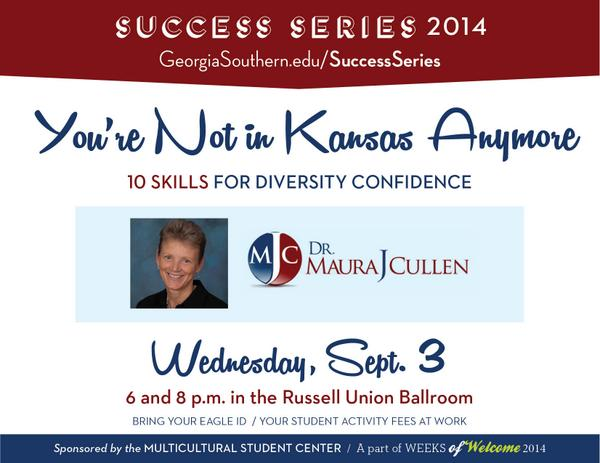

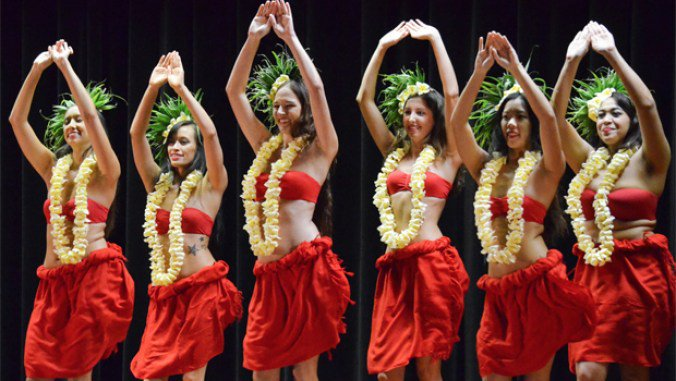

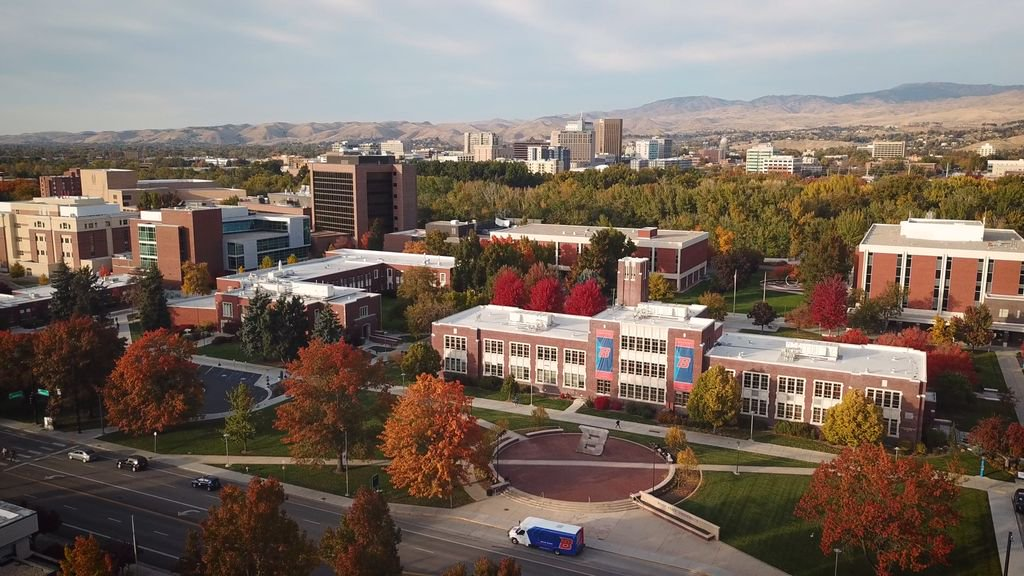

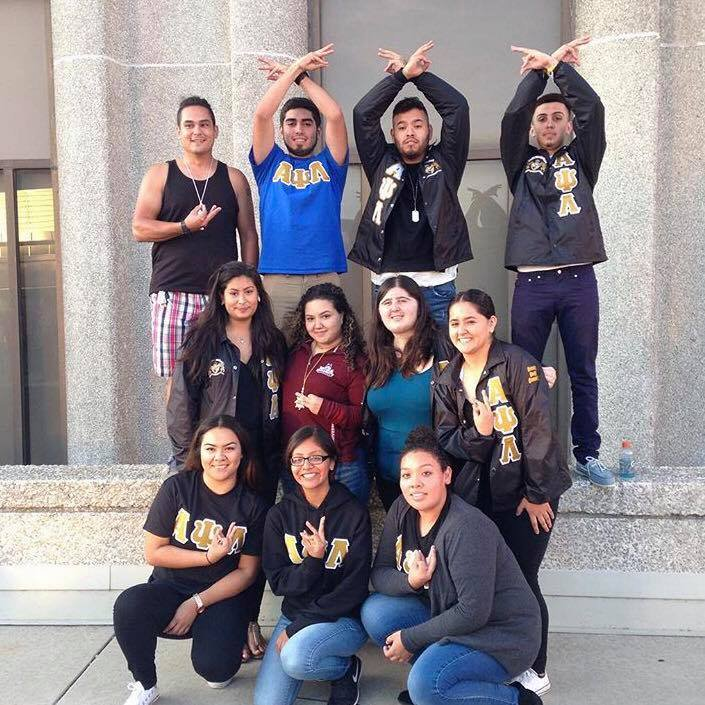

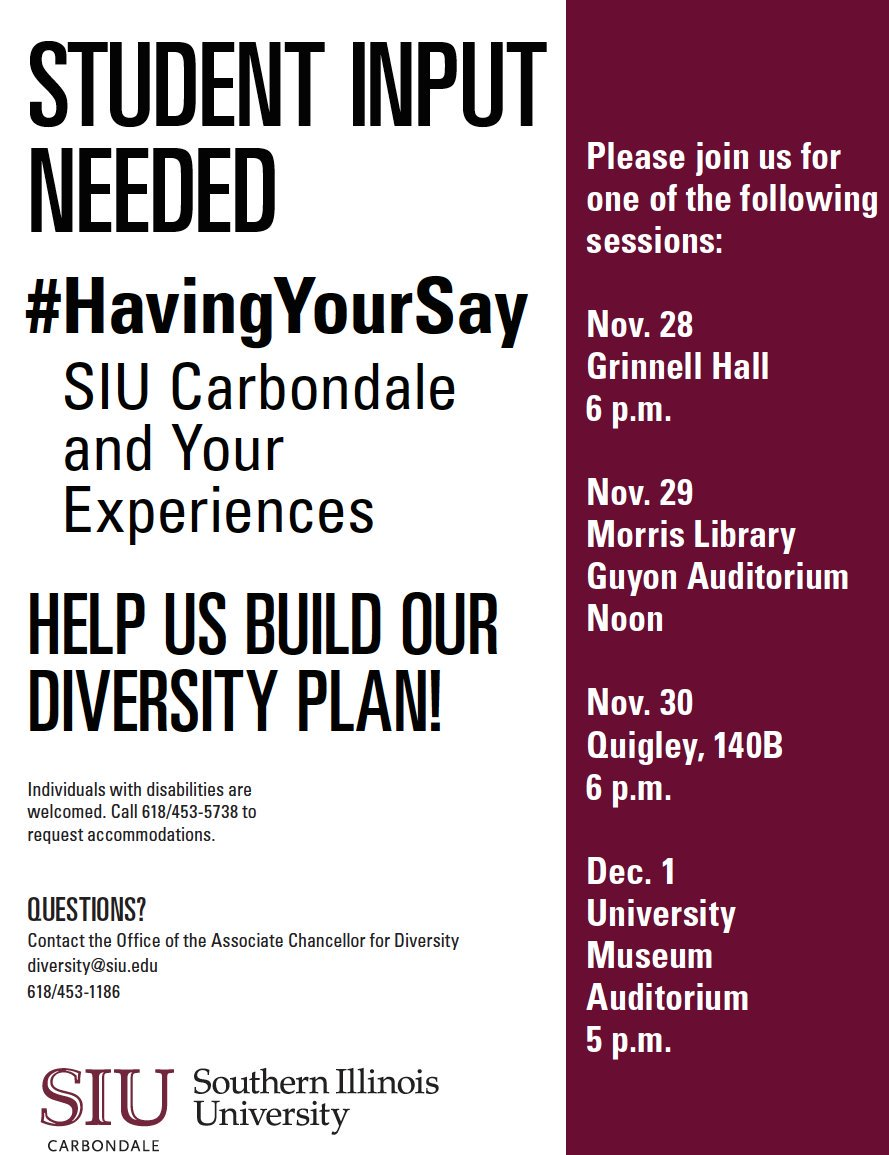

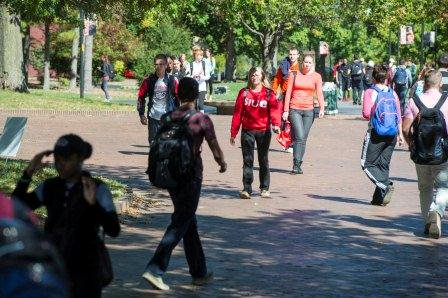

In [59]:
for index,row in diversity_df[(diversity_df.rand_int<1) & (diversity_df.diversity_flag==True)][:50].iterrows():
    if row['photos'] != []:
        display(Image(row['photos'][0], unconfined=True))

There are many kinds of images associated with diversity in these tweets. They range from flyers for diversity-related events to stereotypical photos of college students of different backgrounds working and studying together.

## Tutorials and Code

- **Tutorial: How to Search for Webpages on Google and Scrape Social Media URLS**
    - Objective: Use Python to search for an entity (e.g. a school or company) on Google. Navigate to the first Google search result and scrape any Twitter, Facebook, and Instagram pages.
    - [Link](https://laurendahlin.github.io/colleges_on_social_media/Html/01_scrape_social_handles_final)
- **Code: Review Twitter Handles from Search in a Semi-Automated Fashion**
    - Objective: Convert Twitter URLs to handles. Inspect the URLs and check for quality of match. If webpage did not contain a Twitter URL, search for the Twitter page on Google.
    - [Link](https://laurendahlin.github.io/colleges_on_social_media/Html/02_twitter_username_etl_final)
- **Tutorial: How to Scrape Tweets of Twitter Users (Handles) and Get Around Twitter API Limits**
    - Objective: Get entire history of tweets for particular Twitter users using their handles. Avoid any limits put in place by the Twitter API.
    - [Link](https://laurendahlin.github.io/colleges_on_social_media/Html/03_scrape_tweets_final)
- **Tutorial: How to Process Tweets for Text Analysis**
    - Objective: Process Tweets for text analysis including topic modelling and wordcloud visualization. Processing includes separating words within hashtags, removing entity-specific words, stop words, and lemmatization.
    - [Link](https://laurendahlin.github.io/colleges_on_social_media/Html/04_tweet_processing)